# **Análise Educacional - teste**


> **O que é o Prouni?**

O Programa Universidade para Todos (ProUni) é um programa do governo brasileiro que oferece bolsas de estudo integrais (100%) e parciais (50%) em instituições privadas de ensino superior. O programa tem como objetivo facilitar o acesso à educação superior para estudantes de baixa renda, especialmente aqueles que tenham realizado o ensino médio em escolas da rede pública ou como bolsistas em escolas particulares.

>  **Objetivo: analisar bolsas concedidas e perfil dos beneficiários do Prouni em 2020.**

 Essa análise traz um **detalhamento quantitativo das bolsas** concedidas pelo Prouni pem 2020, segmentadas por região; UF; município; instituição de educação superior; curso; modalidade de ensino (presencial ou EAD); turno e tipo de bolsa. Além disso, há também um **detalhamento do perfil dos beneficiários** do Prouni por sexo; raça/cor; faixa etária e pessoas com deficiência.

In [37]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from google.colab import files
from datetime import datetime

In [38]:
# Importando dataset csv

df = pd.read_csv('/content/ProuniRelatorioDadosAbertos2020.csv', encoding='latin1', delimiter=';')
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTÂNCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTÁCIO DE SÁ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DISTÂNCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMÁCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO


# **Dicionário colunas**

> **Descrição campos**

*   **ANO_CONCESSAO_BOLSA**  
  - Ano da concessão da bolsa ProUni (início da vigência).
  
*   **CODIGO_EMEC_IES_BOLSA**
  - Código do e-MEC referente a IES que
concedeu a bolsa ProUni.
*   **NOME_IES_BOLSA**
  - Nome/Razão Social da Instituição de Ensino Superior que concedeu a bolsa ProUni.
*   **TIPO_BOLSA**
  - Descrição do tipo da bolsa concedida ao beneficiário do ProUn (integral – 100% ou parcial – 50%).
*   **MODALIDADE_ENSINO_BOLSA**
  - Descrição da modalidade de ensino da bolsa concedida ao beneficiário do ProUni (presencial ou ensino à distância – EAD).
*   **NOME_CURSO_BOLSA**
  - Nome do curso do beneficiário da bolsa ProUni.
*   **NOME_TURNO_CURSO_BOLSA**
  - Descrição do turno do curso do beneficiário da bolsa ProUni.
*   **CPF_BENEFICIARIO_BOLSA**
  - CPF do beneficiário da bolsa ProUni.
*   **SEXO_BENEFICIARIO_BOLSA**
  - Sexo informado pelo beneficiário da bolsa ProUni.
*   **RACA_BENEFICIARIO_BOLSA**
  - Raça/Cor informado pelo beneficiário da bolsa ProUni.
*   **DT_NASCIMENTO_BENEFICIARIO**
  - Data de nascimento do beneficiário da bolsa ProUni.
*   **BENEFICIARIO_DEFICIENTE_FISICO**
  - Indicação se o beneficiário da bolsa ProUni é portador de algum tipo de deficiência (sim ou não).
*   **REGIAO_BENEFICIARIO_BOLSA**
  - Nome da região de residência do beneficiário da bolsa ProUni.
*   **SIGLA_UF_BENEFICIARIO_BOLSA**
  - Sigla da UF de residência do beneficiário da bolsa ProUni.
*   **MUNICIPIO_BENEFICIARIO_BOLSA**
  - Nome do Município de residência do beneficiário da bolsa ProUni.

In [39]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO'],
      dtype='object')

# **Limpeza e validação de dados**

> Validação de dados para verificar se há nulos, se o tipo de cada dado está correto, valores distintos em colunas específicas, tratamento de outliers e eliminar duplicatas.





In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64 
 2   NOME_IES_BOLSA                  166830 non-null  object
 3   MUNICIPIO                       166830 non-null  object
 4   CAMPUS                          166830 non-null  object
 5   TIPO_BOLSA                      166830 non-null  object
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object
 7   NOME_CURSO_BOLSA                166792 non-null  object
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object
 9   CPF_BENEFICIARIO                166830 non-null  object
 10  SEXO_BENEFICIARIO               166830 non-null  object
 11  RACA_BENEFICIARIO               166830 non-null  object
 12  DATA_NASCIMENTO               

In [41]:
# Eliminando duplicatas

df_wo_duplicates = df.drop_duplicates()
df_wo_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166723 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             166723 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           166723 non-null  int64 
 2   NOME_IES_BOLSA                  166723 non-null  object
 3   MUNICIPIO                       166723 non-null  object
 4   CAMPUS                          166723 non-null  object
 5   TIPO_BOLSA                      166723 non-null  object
 6   MODALIDADE_ENSINO_BOLSA         166723 non-null  object
 7   NOME_CURSO_BOLSA                166685 non-null  object
 8   NOME_TURNO_CURSO_BOLSA          166723 non-null  object
 9   CPF_BENEFICIARIO                166723 non-null  object
 10  SEXO_BENEFICIARIO               166723 non-null  object
 11  RACA_BENEFICIARIO               166723 non-null  object
 12  DATA_NASCIMENTO               

In [42]:
# Lista de colunas desejadas para checar valores distintos
df_separate_columns = ['TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'BENEFICIARIO_DEFICIENTE_FISICO']

# Loop para printar valores distintos em cada coluna
for column in df_separate_columns:
    distinct_values = df_wo_duplicates[column].unique()
    print(f"Different column values '{column}':")
    for value in distinct_values:
        print(value)
    print("\n")

Different column values 'TIPO_BOLSA':
INTEGRAL
PARCIAL


Different column values 'MODALIDADE_ENSINO_BOLSA':
EAD
PRESENCIAL


Different column values 'SEXO_BENEFICIARIO':
F
M


Different column values 'RACA_BENEFICIARIO':
Parda
Branca
Preta
Amarela
Não Informada
Ind¡gena


Different column values 'BENEFICIARIO_DEFICIENTE_FISICO':
N
S




In [43]:
# Verificando OUTLIERS - aqui, a pessoa mais velha tem 91 anos e a mais nova 0 -> o que é suspeito

# Convertendo a coluna 'DATA_NASCIMENTO' para o formato de data

df_wo_duplicates['DATA_NASCIMENTO'] = pd.to_datetime(df_wo_duplicates['DATA_NASCIMENTO'])

# Achando as datas de nascimento máxima e mínima
birth_date_max = df_wo_duplicates['DATA_NASCIMENTO'].max()
birth_date_min = df_wo_duplicates['DATA_NASCIMENTO'].min()

print("Data de nascimento MÁXIMA:", birth_date_max)
print("Data de nascimento MÍNIMA:", birth_date_min)

<ipython-input-43-e284efbebcff>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_wo_duplicates['DATA_NASCIMENTO'] = pd.to_datetime(df_wo_duplicates['DATA_NASCIMENTO'])


Data de nascimento MÁXIMA: 2020-12-19 00:00:00
Data de nascimento MÍNIMA: 1929-11-19 00:00:00


<ipython-input-43-e284efbebcff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_duplicates['DATA_NASCIMENTO'] = pd.to_datetime(df_wo_duplicates['DATA_NASCIMENTO'])


In [44]:
# LIDANDO COM OUTLIERS - eliminando as linhas em que a idade é menor do que 17 anos até 2020 na coluna 'DATA-NASCIMENTO'

# Calculando a idade baseado na data de nascimento e a data de referência (2020-01-01)
reference_date = datetime(2020, 1, 1)
df_wo_duplicates['IDADE'] = (reference_date - df_wo_duplicates['DATA_NASCIMENTO']).dt.days // 365

# Filtrando linhas com idade maior ou igual a 17 anos e ano de nascimento até 2020
minimum_age = 17
maximum_year = 2020
df_filtered = df_wo_duplicates[(df_wo_duplicates['IDADE'] >= minimum_age) & (df_wo_duplicates['DATA_NASCIMENTO'].dt.year <= maximum_year)]

# Agora 'df_filtered' contém apenas linhas que correspondem ao critério de idade mínimo

<ipython-input-44-e45827266247>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_duplicates['IDADE'] = (reference_date - df_wo_duplicates['DATA_NASCIMENTO']).dt.days // 365


In [45]:
df_filtered['DATA_NASCIMENTO'].max()

Timestamp('2003-01-05 00:00:00')

In [46]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165683 entries, 0 to 166829
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             165683 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           165683 non-null  int64         
 2   NOME_IES_BOLSA                  165683 non-null  object        
 3   MUNICIPIO                       165683 non-null  object        
 4   CAMPUS                          165683 non-null  object        
 5   TIPO_BOLSA                      165683 non-null  object        
 6   MODALIDADE_ENSINO_BOLSA         165683 non-null  object        
 7   NOME_CURSO_BOLSA                165646 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          165683 non-null  object        
 9   CPF_BENEFICIARIO                165683 non-null  object        
 10  SEXO_BENEFICIARIO               165683 non-null  object 

In [47]:
# Calculando a diferença dos datasets antes e após limpeza de dados (em porcentagem %)
original_df_size = len(df)
cleaned_df_size = len(df_filtered)
percentage_deleted = ((original_df_size - cleaned_df_size) / original_df_size) * 100
print(f"Porcentagem de dados deletados: {percentage_deleted:.2f}%")

Porcentagem de dados deletados: 0.69%


# **Análise exploratória inicial**

In [48]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165683 entries, 0 to 166829
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             165683 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           165683 non-null  int64         
 2   NOME_IES_BOLSA                  165683 non-null  object        
 3   MUNICIPIO                       165683 non-null  object        
 4   CAMPUS                          165683 non-null  object        
 5   TIPO_BOLSA                      165683 non-null  object        
 6   MODALIDADE_ENSINO_BOLSA         165683 non-null  object        
 7   NOME_CURSO_BOLSA                165646 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          165683 non-null  object        
 9   CPF_BENEFICIARIO                165683 non-null  object        
 10  SEXO_BENEFICIARIO               165683 non-null  object 

In [49]:
df_filtered['IDADE'].describe()

count    165683.000000
mean         22.104471
std           6.608116
min          17.000000
25%          18.000000
50%          20.000000
75%          24.000000
max          90.000000
Name: IDADE, dtype: float64

In [50]:
df_filtered.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,IDADE
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DISTÂNCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,46
1,2020,163,UNIVERSIDADE ESTÁCIO DE SÁ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DISTÂNCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,32
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMÁCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA,18
4,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO,42
5,2020,203,UNIVERSIDADE SÃO JUDAS TADEU,SAO PAULO,UNIDADE JABAQUARA,INTEGRAL,PRESENCIAL,MEDICINA VETERINÁRIA,NOTURNO,508.XXX.XXX-99,F,Parda,2001-12-17,N,SUDESTE,SP,SAO PAULO,18


# **Visualização por variável e distribuição**

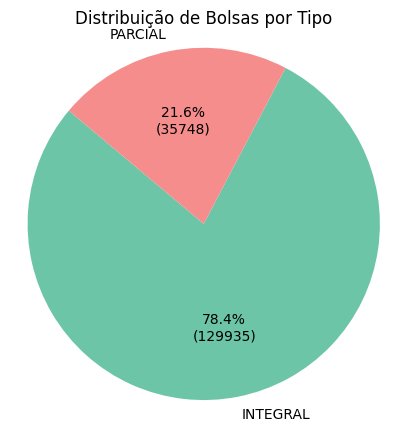

In [51]:
# Dicionário de mapeamento de cores para tipos de bolsa
colors_dict_scholarship = {'INTEGRAL': '#6cc5a7', 'PARCIAL': '#f58d8c'}

# Gráfico de pizza para a distribuição de bolsas por tipo
plt.figure(figsize=(5, 5))
tipo_counts = df_filtered['TIPO_BOLSA'].value_counts()
plt.pie(tipo_counts, labels=tipo_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(tipo_counts) / 100), startangle=140, colors=[colors_dict_scholarship[tipo] for tipo in tipo_counts.index])
plt.title('Distribuição de Bolsas por Tipo')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


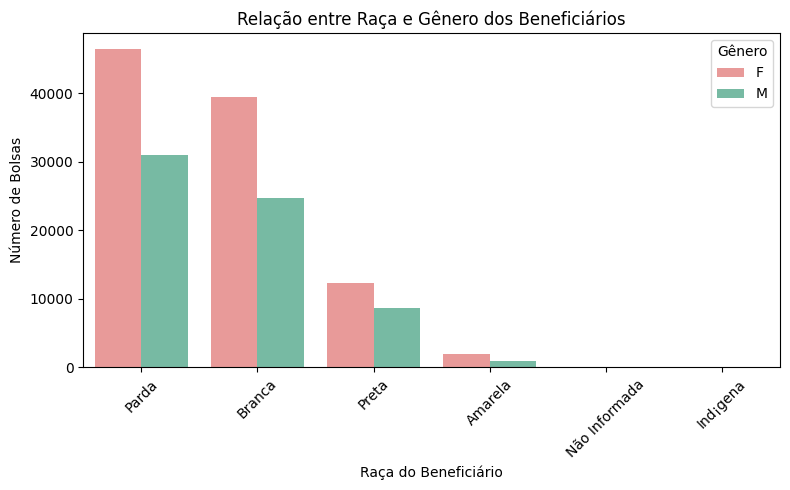

In [52]:
# Dicionário de cores hexadecimais para gênero
cores_generos = {
    'F': '#f58d8c',  # Feminino
    'M': '#6cc5a7'   # Masculino
}

plt.figure(figsize=(8, 5))
sns.set_palette([cores_generos.get(genero, '#808080') for genero in df_filtered['SEXO_BENEFICIARIO'].unique()])
sns.countplot(data=df_filtered, x='RACA_BENEFICIARIO', hue='SEXO_BENEFICIARIO')
plt.title('Relação entre Raça e Gênero dos Beneficiários')
plt.xlabel('Raça do Beneficiário')
plt.ylabel('Número de Bolsas')
plt.legend(title='Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

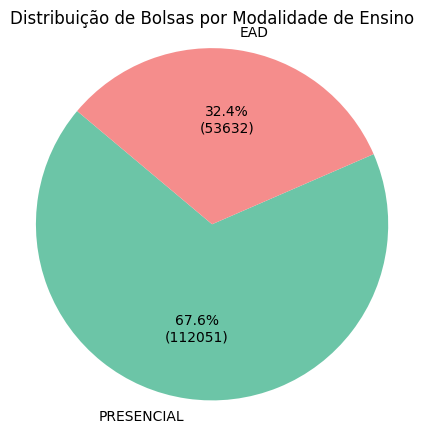

In [53]:
# Dicionário de cores hexadecimais associadas a cada modalidade de ensino
cores_modalidades = {
    'PRESENCIAL': '#6cc5a7',
    'EAD': '#f58d8c'
}

plt.figure(figsize=(5, 5))
modalidade_counts = df_filtered['MODALIDADE_ENSINO_BOLSA'].value_counts()
modalidades = modalidade_counts.index
cores = [cores_modalidades.get(modalidade, '#808080') for modalidade in modalidades]

plt.pie(
    modalidade_counts,
    labels=modalidades,
    colors=cores,
    autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(modalidade_counts) / 100),
    startangle=140
)

plt.title('Distribuição de Bolsas por Modalidade de Ensino')
plt.axis('equal')
plt.show()


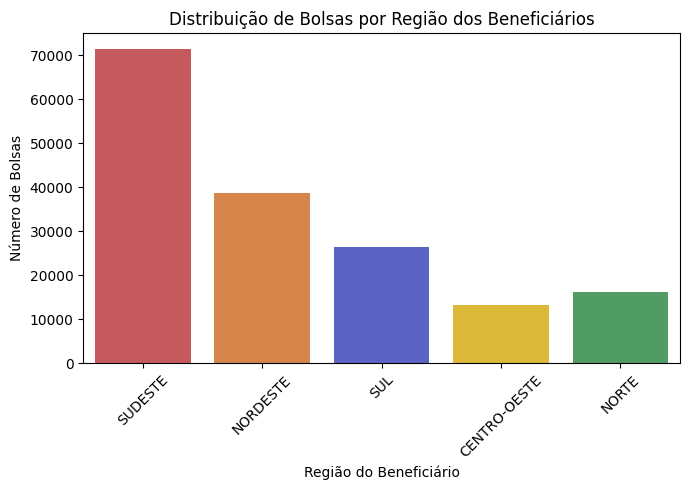

In [54]:
# Dicionário de cores hexadecimais associadas a cada região
cores_regioes = {
    'SUDESTE': '#d5494e',
    'NORDESTE': '#ee8332',
    'SUL': '#4b54d4',
    'CENTRO-OESTE': '#f8c91e',
    'NORTE': '#44a95e'
}

plt.figure(figsize=(7, 5))
sns.set_palette(sns.color_palette([cores_regioes.get(regiao, '#808080') for regiao in df_filtered['REGIAO_BENEFICIARIO'].unique()]))
sns.countplot(data=df_filtered, x='REGIAO_BENEFICIARIO')
plt.title('Distribuição de Bolsas por Região dos Beneficiários')
plt.xlabel('Região do Beneficiário')
plt.ylabel('Número de Bolsas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


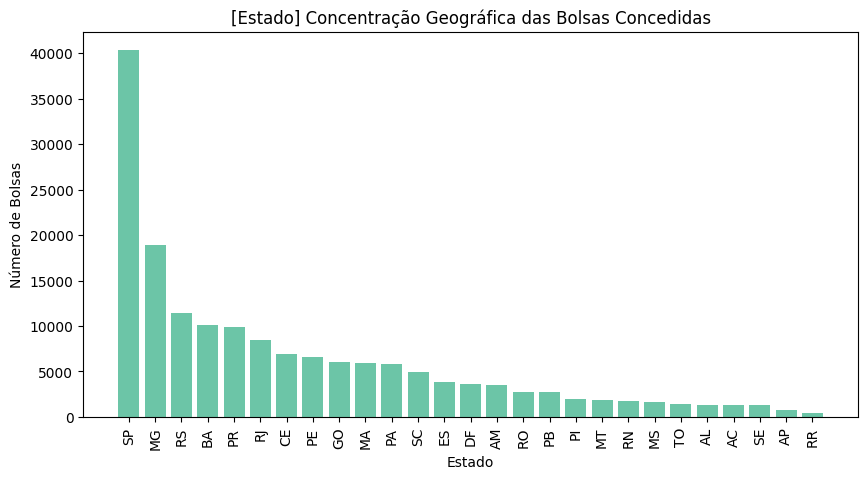

In [55]:
# Agrupar os dados por estado e contar o número de bolsas em cada um
bolsas_por_estado = df_filtered.groupby('UF_BENEFICIARIO')['NOME_IES_BOLSA'].count().reset_index()

# Ordenar os estados pela quantidade de bolsas
bolsas_por_estado = bolsas_por_estado.sort_values(by='NOME_IES_BOLSA', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(bolsas_por_estado['UF_BENEFICIARIO'], bolsas_por_estado['NOME_IES_BOLSA'], color='#6cc5a7')
plt.xlabel('Estado')
plt.ylabel('Número de Bolsas')
plt.title('[Estado] Concentração Geográfica das Bolsas Concedidas')
plt.xticks(rotation=90)
plt.show()

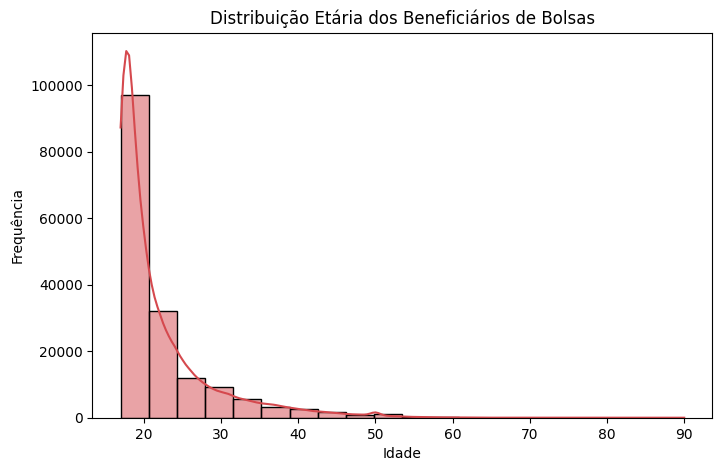

In [56]:
# Distribuição etária dos beneficiários
plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtered, x='IDADE', bins=20, kde=True)
plt.title('Distribuição Etária dos Beneficiários de Bolsas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

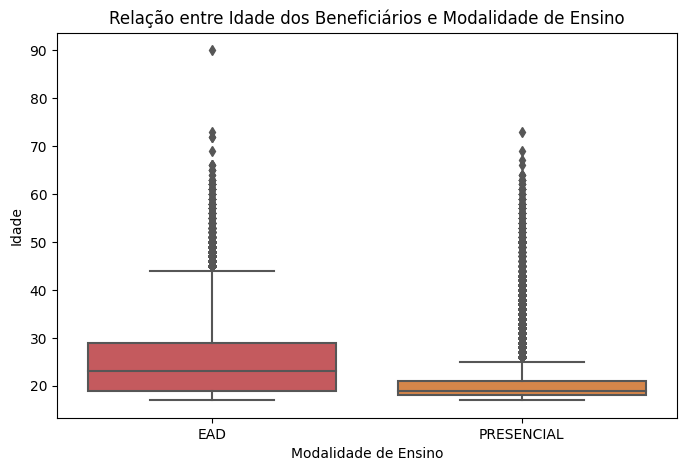

In [57]:
# Relação entre idade dos beneficiários e modalidade de ensino
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='MODALIDADE_ENSINO_BOLSA', y='IDADE')
plt.title('Relação entre Idade dos Beneficiários e Modalidade de Ensino')
plt.xlabel('Modalidade de Ensino')
plt.ylabel('Idade')
plt.show()


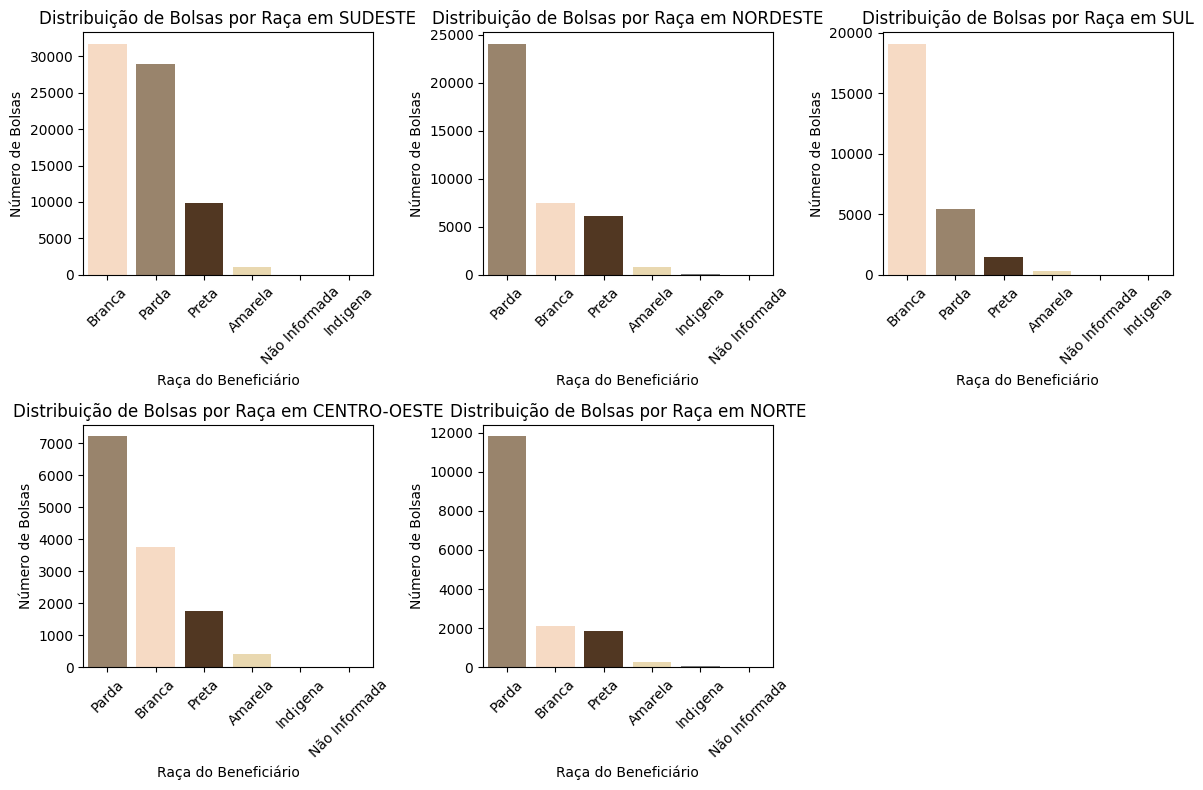

In [61]:
# Dicionário de cores hexadecimais para raças
cores_racas = {
    'Parda': '#a18464',
    'Branca': '#fed9bc',
    'Preta': '#59361a',
    'Amarela': '#f3dca6',
    'Não Informada': '#e2b58c',
    'Indígena': '#ab6a4e'
}

plt.figure(figsize=(12, 8))

# Loop pelas regiões para criar os gráficos
for regiao in df_filtered['REGIAO_BENEFICIARIO'].unique():
    plt.subplot(2, 3, list(cores_regioes.keys()).index(regiao) + 1)

    # Obtém as raças presentes na região atual e conta a frequência de cada raça
    racas_freq_na_regiao = df_filtered[df_filtered['REGIAO_BENEFICIARIO'] == regiao]['RACA_BENEFICIARIO'].value_counts()

    # Ordena as raças por frequência decrescente
    racas_ordenadas = racas_freq_na_regiao.index

    # Cria a paleta de cores respeitando a ordem das raças na região
    paleta_cores = [cores_racas.get(raca, '#808080') for raca in racas_ordenadas]
    sns.set_palette(paleta_cores)

    sns.countplot(data=df_filtered[df_filtered['REGIAO_BENEFICIARIO'] == regiao],
                  x='RACA_BENEFICIARIO', order=racas_ordenadas)
    plt.title(f'Distribuição de Bolsas por Raça em {regiao}')
    plt.xlabel('Raça do Beneficiário')
    plt.ylabel('Número de Bolsas')
    plt.xticks(rotation=45)

    # Cria um objeto de legenda vazio e o oculta
    legenda = plt.legend([], [], frameon=False)
    legenda.set_visible(False)

# Ajuste de espaçamento horizontal e vertical entre os gráficos
plt.subplots_adjust(wspace=0.5, hspace=0.7)

plt.tight_layout()
plt.show()


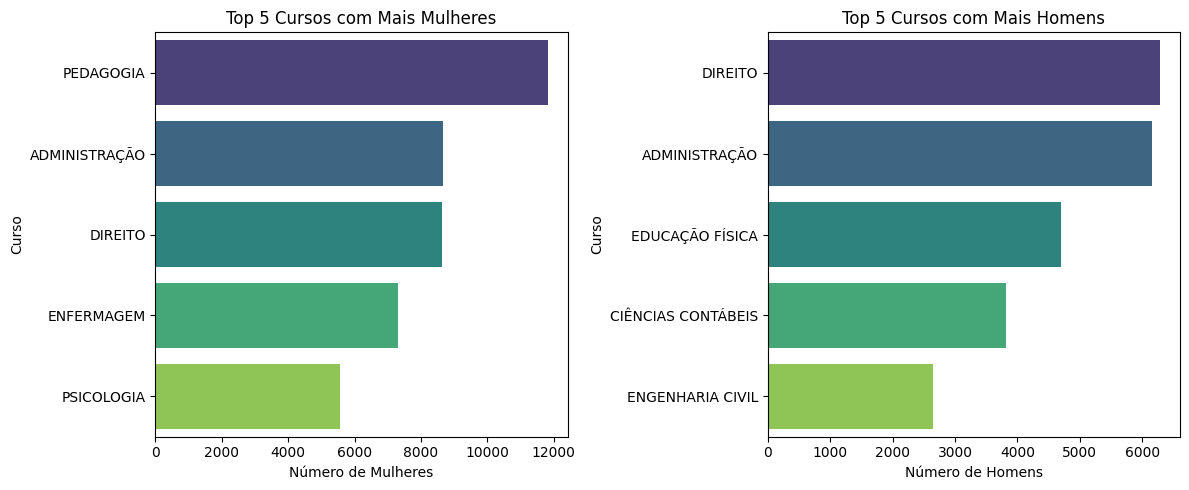

In [60]:
# Agrupando os dados por curso e gênero, contando o número de beneficiários em cada
curso_genero_counts = df_filtered.groupby(['NOME_CURSO_BOLSA', 'SEXO_BENEFICIARIO']).size().unstack()

# Obter os top 5 cursos com mais mulheres
top_5_mulheres = curso_genero_counts['F'].nlargest(5)

# Obter os top 5 cursos com mais homens
top_5_homens = curso_genero_counts['M'].nlargest(5)

# Criando gráficos lado a lado
plt.figure(figsize=(12, 5))

# Gráfico 1: Top 5 cursos com mais mulheres
plt.subplot(1, 2, 1)
sns.barplot(x=top_5_mulheres.values, y=top_5_mulheres.index, palette='viridis')
plt.title('Top 5 Cursos com Mais Mulheres')
plt.xlabel('Número de Mulheres')
plt.ylabel('Curso')

# Gráfico 2: Top 5 cursos com mais homens
plt.subplot(1, 2, 2)
sns.barplot(x=top_5_homens.values, y=top_5_homens.index, palette='viridis')
plt.title('Top 5 Cursos com Mais Homens')
plt.xlabel('Número de Homens')
plt.ylabel('Curso')

# Ajusta de espaçamento entre os gráficos
plt.tight_layout()

plt.show()


# **Conclusões e recomendações**

> **Distribuição de bolsas por tipo:** Foi verificado que a maioria das bolsas concedidas foram do tipo integral. **Recomendações:**

1.   **Entender demanda por tipos de bolsas:** Avaliar a demanda por bolsas integrais e parciais em diferentes regiões e modalidades de ensino. Se houver uma grande diferença na distribuição entre os tipos de bolsas, considere ajustar as alocações para melhor atender às necessidades dos beneficiários.
2.   **Aumentar Bolsas Integrais para Grupos Vulneráveis:** Identificar grupos de beneficiários que possam se beneficiar mais de bolsas integrais, como estudantes de baixa renda ou grupos subrepresentados. Aumentar a disponibilidade de bolsas integrais para esses grupos pode ter um impacto significativo em sua acessibilidade à educação.

> **Relação entre Raça e Gênero dos beneficiário:** Foi verificado que, para as categorias 'não informado', 'indígena' e 'amarela' não há números significativos na amostra em comparação com as outras raças (branca, parda e preta). **Recomendação:**

1.   **Incentivar Participação de Grupos Subrepresentados:** Focar em programas de divulgação e incentivo que atinjam grupos subrepresentados, como as raças preta, indígena e amarela, para aumentar sua participação na educação superior.

> **Distribuição de bolsas por Modalidade de Ensino (EAD ou Presencial):** Pode-se concluir que a preferência pela modalidade de ensino presencial é mais alta, representando uma parcela significativa das bolsas concedidas. Apesar da preferência por cursos presenciais, uma parcela substancial de beneficiários opta por cursos a distância, indicando a importância de oferecer opções diversificadas de modalidades. A presença considerável de cursos a distância sugere que muitos beneficiários valorizam a flexibilidade e a conveniência oferecidas por essa modalidade. **Recomendações:**

1.   **Avaliar Necessidades de Flexibilidade:** Identificar os motivos por trás da preferência pelo ensino presencial e a escolha por cursos a distância. Isso pode ajudar a personalizar os programas e opções para melhor atender às necessidades e preferências dos beneficiários.
2.   **Apoiar Infraestrutura de EAD:** Se a modalidade de ensino a distância estiver em crescimento, assegurar que a infraestrutura tecnológica, suporte técnico e recursos de aprendizado online estejam devidamente implementados e atualizados.

> **Distribuição de bolsas por região dos beneficiários:** Os estados mais populosos e economicamente desenvolvidos, como SP, MG e RS, concentram uma quantidade significativa de bolsas, refletindo sua infraestrutura educacional. Estados com menor quantidade de bolsas, como RR, AP, SE, AC, AL e TO, podem enfrentar desafios adicionais no acesso à educação superior e requerem atenção especial. **Recomendações:**

1.   **Expansão em Estados Menos Atendidos:** Priorizar a expansão de programas de bolsas e infraestrutura educacional em estados com menor presença, garantindo um acesso mais equitativo e diversificado.
2.   **Programas de Parcerias Inter-regionais:** Estabelecer programas de parceria entre estados mais e menos desenvolvidos, com o objetivo de compartilhar recursos educacionais e experiências pedagógicas.


> **Distribuição etária dos beneficiários de bolsas:** A ampla faixa etária, com idades variando de 17 a 90 anos, indica a presença de beneficiários de diferentes idades buscando oportunidades educacionais. A média de idade de 22 anos e a concentração de idades no percentil 25% (18 anos) e percentil 50% (20 anos) indicam que a maioria dos beneficiários é jovem. A presença de beneficiários com idades mais avançadas (inclusive até 90 anos) sugere a busca por educação contínua e oportunidades de aprimoramento profissional. **Recomendações:**

1.   **Flexibilidade para Diferentes Idades:** Oferecer opções de cursos e programas educacionais flexíveis que atendam às necessidades de diferentes faixas etárias, permitindo a educação ao longo da vida.
2.   **Monitoramento e Avaliação:** Realizar pesquisas periódicas para entender melhor as motivações e desafios de beneficiários de diferentes faixas etárias, a fim de ajustar programas e políticas.

> **Relação entre idade dos beneficiários e modalidade de ensino:** Beneficiários que optam pelo ensino a distância (EAD) geralmente têm uma faixa de idade mais ampla, incluindo uma distribuição de idades mais variada, desde jovens até idades mais avançadas. Beneficiários que optam pelo ensino presencial tendem a ser mais jovens, com a faixa interquartil sugerindo que a maioria está na faixa dos 17 aos 22 anos. **Recomendações:**

1.   **Aconselhamento Personalizado:** Oferecer serviços de aconselhamento educacional personalizado, considerando as preferências de idade e modalidade dos beneficiários, para auxiliar nas decisões de escolha de curso.
2.   **Monitorar Mudanças nas Preferências:** Manter um monitoramento contínuo das tendências de idade e preferências de modalidade, para adaptar e melhorar os programas conforme as mudanças nas demandas educacionais.

> **Distribuição de bolsas por raça e região:** Nas regiões onde as raças branca e parda apresentam equilíbrio, isso pode refletir uma maior diversidade racial e inclusão nas oportunidades educacionais. Em diversas regiões, a raça parda é a mais frequente, sugerindo uma demografia mais diversificada e abrangente. Em algumas regiões, como o Sul, a raça branca predomina nas bolsas concedidas, podendo indicar uma necessidade de ampliar esforços para garantir uma maior inclusão racial. **Recomendações:**

1.   **Programas de Diversidade:** Implementar programas de promoção da diversidade, incentivando a participação de diferentes grupos raciais em cursos e oportunidades educacionais.
2.   **Apoio a Grupos Menos Representados:** Oferecer suporte adicional a grupos raciais menos representados, incluindo bolsas de estudo direcionadas e programas de apoio acadêmico.

> **Cursos predominante entre beneficiários do sexo feminino e masculino:** A análise revela algumas diferenças nas escolhas de carreira entre homens e mulheres. Certos cursos, como Pedagogia, Enfermagem e Psicologia, tendem a atrair mais mulheres, enquanto cursos como Engenharia Civil e Educação Física atraem mais homens. **Recomendações:**

1.   **Promoção da Diversidade:** Promover a diversificação de gênero em cursos que historicamente atraem predominantemente um único gênero, incentivando a igualdade de oportunidades.
2.   **Desconstrução de Estereótipos:** Implementar iniciativas que desafiem estereótipos de gênero em relação a escolhas de carreira, permitindo que os estudantes escolham com base em interesses e habilidades, não apenas gênero.





























